In [148]:
#Load packages, including KNeighborsClassifier

import numpy as np
import pandas as pd
import pprint
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import roc_auc_score




In [149]:
#Assign values to array

mnist = load_digits()
print(mnist.data.shape)

b = np.array(mnist.data)


(1797, 64)


In [150]:
# Calculated distances of a randon test element [100] from all other elements.  
distances = np.linalg.norm(b - b[100], axis=1)
print (distances)

#Assume k=100 for experimental purposes
k = 100

#Find list of IDs of elements nearest (neighbors) to the test element.
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids


[50.42816673 46.86149806 53.07541804 ... 47.9895822  48.83646179
 52.16320542]


array([ 100,   97, 1244, 1777,   24,  473,    4,   64, 1788, 1198, 1767,
       1691,  507, 1171,  497,  817, 1254,  863, 1267, 1351,  297, 1278,
        454,  124,   41, 1387,  909,  380, 1011,  410,   14, 1408,  496,
       1731, 1398,  919, 1257, 1754, 1791,  887, 1735, 1397, 1778, 1456,
       1137,  390,  486, 1291,  427,  247, 1764,  970,  353,  367, 1539,
        714, 1328, 1609,  194, 1161, 1681, 1355, 1384,  483,  900, 1502,
        929, 1225,  450,  154,  660,  733,  366,  790, 1221,  510, 1374,
       1001,  840, 1573,  144,  650, 1268,  966,  239, 1708,  111, 1671,
        701,  250,  228,   68, 1311, 1483, 1569, 1053, 1651,  670, 1301,
       1645], dtype=int64)

In [151]:
#Display the values of elements nearest (neighbors) to the test element.

nearest_neighbor_rings = b[nearest_neighbor_ids]
nearest_neighbor_rings
print("List of neighbor elements: " , mnist.target[nearest_neighbor_ids])

# Count of occurrence of each digit within the k nearest neighbor
counts = np.bincount(mnist.target[nearest_neighbor_ids])
print ("Count of occurrence of each digit within the k nearest neighbor: ", counts)

# Identify test element as the digit voted as most popular in the set of the k nearest neighbors.
print("Most popular digit: ", np.argmax(counts))

# Classify the test element accordingly (i.e. based on the popular vote).
print("Test element is therefore: ", np.argmax(counts))

List of neighbor elements:  [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 0 4 4 4 4 4 4 4 4 0 4 4 4 4 4 6 4 4 4 4 6]
Count of occurrence of each digit within the k nearest neighbor:  [ 2  0  0  0 95  0  3]
Most popular digit:  4
Test element is therefore:  4


In [152]:
# Split data into training and test datasets

trainData,testData,trainLabel,testLabel = train_test_split(np.array(mnist.data),mnist.target,test_size=0.25,random_state=42)

print("training data points: {}".format(len(trainLabel)))
print("testing data points: {}".format(len(testData)))

training data points: 1347
testing data points: 450


In [153]:
#Identify k value with best accuracy

kVals = np.arange(1,30,2)
error_rates = []

for k in kVals:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData,trainLabel)
 
    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabel)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))

    

k=1, accuracy=100.00%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=99.26%
k=19, accuracy=98.52%
k=21, accuracy=99.26%
k=23, accuracy=98.52%
k=25, accuracy=98.52%
k=27, accuracy=98.52%
k=29, accuracy=98.52%


In [154]:
# Create model and run prediction on test data

model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainData,trainLabel)
predictions = model.predict(testData)

# print classification report

print(classification_report(testLabel,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        38
           3       0.98      1.00      0.99        46
           4       0.98      1.00      0.99        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.97      0.97        38
           9       0.98      0.92      0.95        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [156]:
#Print confusion matrix

print ("Confusion matrix")
print(confusion_matrix(testLabel,predictions))


Confusion matrix
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  1  1  1  0  0  1 44]]


Predicted as : 6


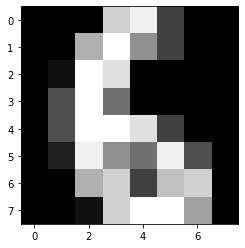

Predicted as : 6


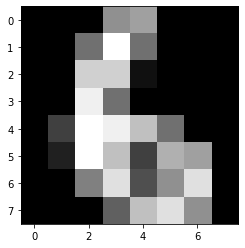

Predicted as : 3


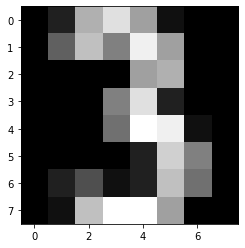

Predicted as : 5


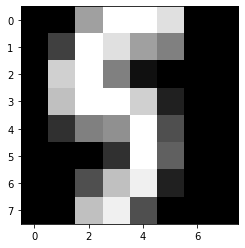

Predicted as : 8


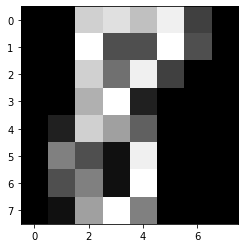

In [157]:
#Generate predictions on some random test elements

for i in np.random.randint(0, high=len(testLabel), size=(5,)):
         # grab the image and classify it
         image = testData[i]
         prediction = model.predict([image])[0]
        
         # show the prediction
         
         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((8,8))
         plt.imshow(pixels,cmap='gray')
         
         print("Predicted as : {}".format(prediction))
         plt.show()

        
